## Visualize clustering outcomes
Putting this in a separate notebook for now because the other one is still working on silhouettes.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from pathlib import Path

In [2]:
cluster_path = Path('/Users/wmk934/data/perceptual_models/data/clustering')
cluster_file = f'clustering_results_clusters_2_to_50.shp'
cluster_data = gpd.read_file(cluster_path/cluster_file)

In [3]:
img_path = Path('/Users/wmk934/data/perceptual_models/img/cluster_maps')
img_path.mkdir(parents=True, exist_ok=True)

In [4]:
cluster_data.columns

Index(['COMID', 'elev_mean', 'slope_mean', 'im_mean', 'imr_mean', 'fs_mean',
       'depth_mean', 'lg_water', 'lg_non-cro', 'lg_irrigat', 'lg_rainfed',
       'igbp_1', 'igbp_2', 'igbp_3', 'igbp_4', 'igbp_5', 'igbp_6', 'igbp_7',
       'igbp_8', 'igbp_9', 'igbp_10', 'igbp_11', 'igbp_12', 'igbp_13',
       'igbp_14', 'igbp_15', 'igbp_16', 'igbp_17', 'cluster_2', 'cluster_3',
       'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8',
       'cluster_9', 'cluster_10', 'cluster_11', 'cluster_12', 'cluster_13',
       'cluster_14', 'cluster_15', 'cluster_16', 'cluster_17', 'cluster_18',
       'cluster_19', 'cluster_20', 'cluster_21', 'cluster_22', 'cluster_23',
       'cluster_24', 'cluster_25', 'cluster_26', 'cluster_27', 'cluster_28',
       'cluster_29', 'cluster_30', 'cluster_31', 'cluster_32', 'cluster_33',
       'cluster_34', 'cluster_35', 'cluster_36', 'cluster_37', 'cluster_38',
       'cluster_39', 'cluster_40', 'cluster_41', 'cluster_42', 'cluster_43',
       'clust

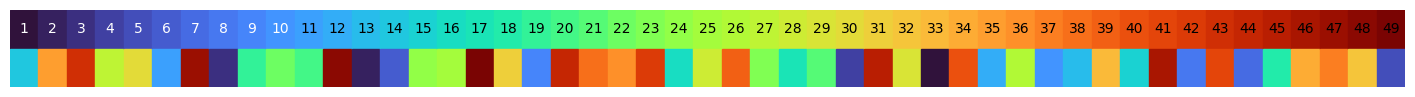

In [6]:
# Create a custom color map for values
num_colors = 49

# Generate a list of evenly spaced values from 0 to 1
values = np.linspace(0, 1, num_colors)

# Create a colormap using these values
colors_norm = plt.cm.turbo(values)
colors_shuf = plt.cm.turbo(values)
np.random.shuffle(colors_shuf)

# Plot the colormap
fig, ax = plt.subplots(figsize=(18, 1))
for i, (color_n,color_s) in enumerate(zip(colors_norm,colors_shuf)):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color_n))
    ax.add_patch(plt.Rectangle((i, -1), 1, 1, color=color_s))
    tcolor = 'black'
    if i < 10: tcolor = 'white'
    ax.text(i + 0.5, 0.5, str(i + 1), ha='center', va='center', color=tcolor)

ax.set_xlim(0, num_colors)
ax.set_ylim(-1, 1)
ax.set_axis_off()
plt.show()

In [13]:
for n_clusters in range(2,50):
    column = f'cluster_{n_clusters}'
    cmap = mcolors.ListedColormap(colors_shuf[0:n_clusters])
    ax = cluster_data.plot(column=column, cmap=cmap, legend=True, legend_kwds={'shrink':0.8})
    cbar = ax.get_figure().get_axes()[1]  # Assuming colorbar is the second axes
    cbar.set_yticklabels([])  # Disable tick labels
    cbar.set_yticks([])  # Disable tick marks - we need to do this so that the axis don't get shifted around between different n_cluster values, in case where the colorbar ticks change
    plt.title(column);
    plt.savefig(img_path / f'clustering_outcomes_{n_clusters:02}.png', dpi=300, bbox_inches='tight')
    plt.close()